In [0]:
from fastai.vision import *
import pandas as pd
import urllib.request


In [59]:
classes = ['cheetah','jaguar', 'leopard'] 
path = Path('data/cats')
for i in classes:
  folder = i
  file_name = i + '.csv'
  csv_path = "https://raw.githubusercontent.com/shreyus3003/Deep_Learning/master/Datasets/" + file_name
  df = pd.read_csv(csv_path)
  df.to_csv(path/filename, index=False, encoding='utf-8')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  path.ls()
  download_images(path/filename, dest, max_pics=200, max_workers=0)

In [60]:
path.ls()

[PosixPath('data/cats/jaguar'),
 PosixPath('data/cats/cheetah'),
 PosixPath('data/cats/leopard'),
 PosixPath('data/cats/cheetah.csv'),
 PosixPath('data/cats/.ipynb_checkpoints')]

In [61]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cheetah


jaguar


leopard


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [63]:
data.classes

['cheetah', 'jaguar', 'leopard']

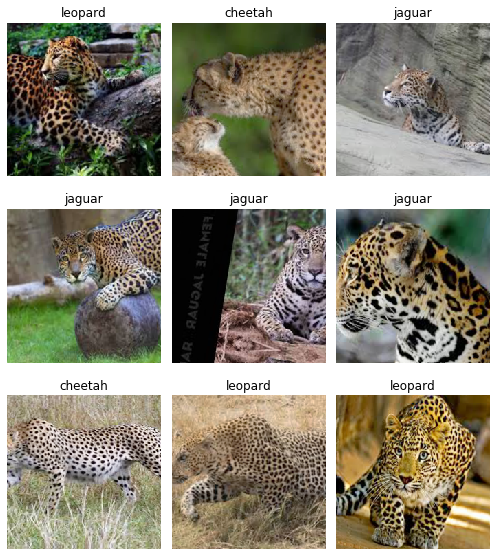

In [64]:
data.show_batch(rows=3, figsize=(7,8))

In [65]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'jaguar', 'leopard'], 3, 304, 76)

In [66]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [67]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.609053,0.472268,0.250000,00:07
1,1.139747,0.443832,0.157895,00:05
2,0.965144,0.406722,0.118421,00:05
3,0.784454,0.418841,0.092105,00:05


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [70]:
interp = ClassificationInterpretation.from_learner(learn)

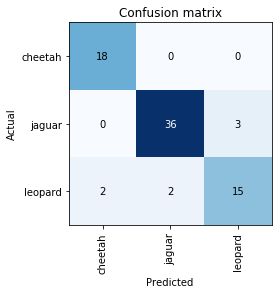

In [71]:
interp.plot_confusion_matrix()

##Delete the images which are not one of those classes.(Clean up)

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [0]:
learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [0]:
learn.export()

In [75]:
defaults.device = torch.device('cpu')
path.ls()

[PosixPath('data/cats/models'),
 PosixPath('data/cats/jaguar'),
 PosixPath('data/cats/cheetah'),
 PosixPath('data/cats/leopard'),
 PosixPath('data/cats/export.pkl'),
 PosixPath('data/cats/cheetah.csv'),
 PosixPath('data/cats/.ipynb_checkpoints')]

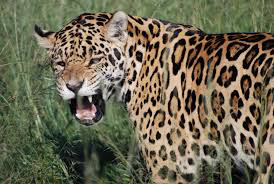

In [76]:
img = open_image(path/'jaguar'/'00000001.jpg')
img

In [0]:
learn = load_learner(path)


In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category jaguar

## Try with high learning rate

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,13.650475,5665414656.000000,0.828947,00:04


## Try with low learning rate

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.047192,1.877350,0.723684,00:04
1,1.974157,1.679685,0.710526,00:04
2,1.945808,1.587044,0.657895,00:04
3,1.902621,1.516734,0.657895,00:04
4,1.882955,1.465862,0.631579,00:04


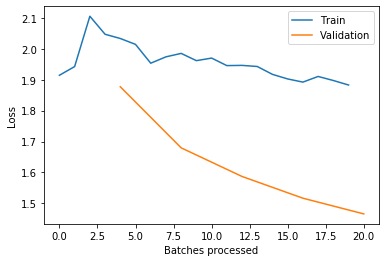

In [0]:
learn.recorder.plot_losses()

## Try with few epocs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.952608,3.196508,0.526316,00:05


## Try with many epocs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,1.766967,1.871801,0.695906,00:06
1,1.640568,1.715710,0.666667,00:03
2,1.611448,1.574317,0.622807,00:03
3,1.591790,1.423123,0.599415,00:03
4,1.545957,1.304165,0.570175,00:03
5,1.439991,1.203850,0.523392,00:03
6,1.340680,1.114316,0.517544,00:03
7,1.243732,1.029097,0.476608,00:03
8,1.148838,0.954208,0.441520,00:03
9,1.052479,0.883557,0.409357,00:03


##Check with old config

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.860129,1.219262,0.421053,00:04
1,1.307636,0.362186,0.131579,00:04
2,1.009994,0.326913,0.105263,00:04
3,0.854432,0.305018,0.105263,00:04
